1.0.0


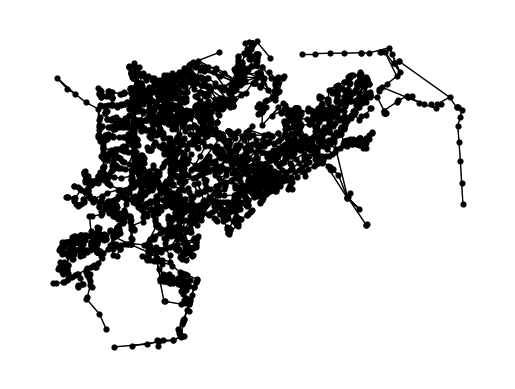

('VALVE-3890', <Valve 'VALVE-3890' from 'JUNCTION-3160' to 'JUNCTION-2848', valve_type='PRValve', diameter=0.15239999999999998, minor_loss=0.0, setting=21.103161781675514, status=Active>)
('VALVE-3890', <Valve 'VALVE-3890' from 'JUNCTION-3160' to 'JUNCTION-2848', valve_type='PRValve', diameter=0.15239999999999998, minor_loss=0.0, setting=21.103161781675514, status=Active>)


OSError: dlopen(/Users/hoseinlook/Projects/self/WDN/venv/lib/python3.9/site-packages/wntr/epanet/Darwin/libepanet22_win32.dylib, 0x0006): tried: '/Users/hoseinlook/Projects/self/WDN/venv/lib/python3.9/site-packages/wntr/epanet/Darwin/libepanet22_win32.dylib' (no such file), '/System/Volumes/Preboot/Cryptexes/OS/Users/hoseinlook/Projects/self/WDN/venv/lib/python3.9/site-packages/wntr/epanet/Darwin/libepanet22_win32.dylib' (no such file), '/Users/hoseinlook/Projects/self/WDN/venv/lib/python3.9/site-packages/wntr/epanet/Darwin/libepanet22_win32.dylib' (no such file)

In [13]:
import wntr

print(wntr.__version__)
wn = wntr.network.WaterNetworkModel('networks/net6.inp')
# print(list(wn.nodes.values()))
# print(wn.junctions)


sim = wntr.sim.WNTRSimulator(wn)


wntr.graphics.plot_network(wn)
print(list(wn.valves())[0])
# print(list(wn.valves())[0][1].node)
list(wn.valves())[0][1].initial_status = "OPEN"
list(wn.valves())[0][1].initial_setting = 30
print(list(wn.valves())[0])
results = sim.run_sim()
list(wn.valves())[0][1].initial_status = "OPEN"

print(list(wn.valves())[0])
pressure_at_node123 = results.node['pressure'].loc[:,'JUNCTION-2848']
# xx = results.link["flowrate"].loc[:,"10"].plot()
ax = pressure_at_node123.plot()
text = ax.set_xlabel("Time (s)")
text = ax.set_ylabel("Pressure (m)")

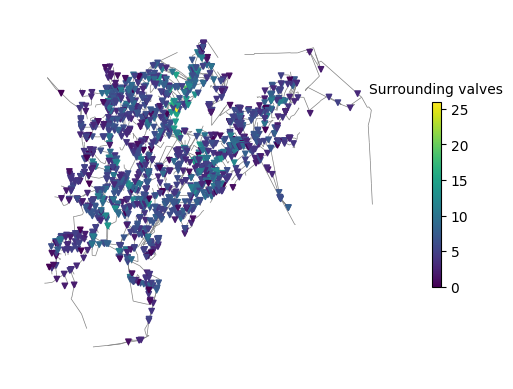

In [9]:
valve_layer = wntr.network.generate_valve_layer(wn, 'strategic', 2, seed=123)
G = wn.to_graph()
node_segments, link_segments, seg_sizes = wntr.metrics.topographic.valve_segments(G,valve_layer)
valve_attributes = wntr.metrics.valve_segment_attributes(valve_layer, node_segments,link_segments)
ax = wntr.graphics.plot_valve_layer(wn, valve_layer,valve_attributes['num_surround'], colorbar_label='Surrounding valves')

('pvr1', <Valve 'pvr1' from '269' to '271', valve_type='PRValve', diameter=1.524, minor_loss=0.0, setting=-0.14068774521117008, status=Closed>)


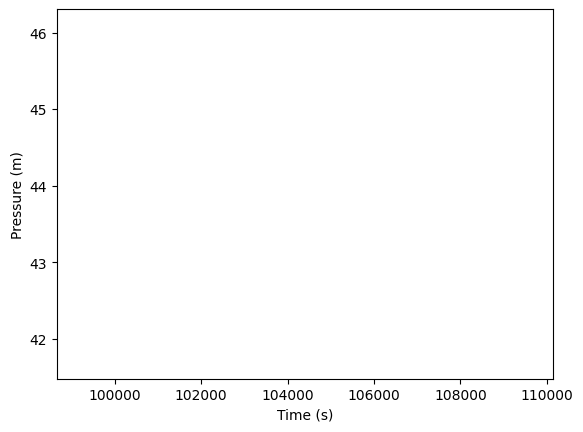

In [62]:
results = sim.run_sim()
list(wn.valves())[0][1].initial_status = 0
print(list(wn.valves())[0])
pressure_at_node123 = results.node['pressure'].loc[:,'271']
ax = pressure_at_node123.plot()
text = ax.set_xlabel("Time (s)")
text = ax.set_ylabel("Pressure (m)")

In [ ]:
ax = wntr.graphics.plot_network(wn, node_attribute='pressure',node_colorbar_label='Elevation (m)')

In [ ]:
pressure_at_node123 = results.link['flowrate'].loc[: , "2062"]
pressure_at_node123.plot()

In [ ]:
list(wn.valves())

In [ ]:
type(list(wn.valves())[0][1])

In [ ]:
from wntr.network.elements import PRValve

In [ ]:
p =list(wn.valves())[0][1]
p.initial_status = 0

In [ ]:
list(wn.nodes)

In [ ]:
results.node['pressure']["211"]

In [ ]:
sim.run_sim().node['pressure']["211"]